In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

train_path = "TRAIN"
test_path ="TEST"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# visualization
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path +'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append((img_array))
        y_data.append(category.split('\\')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:29<00:00, 336.27it/s] 


In [14]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x24e8d7378c0>,
 [Text(-1.131700766397965, -0.20433642684127334, 'Organic'),
  Text(1.1317007485343022, 0.20433652577769967, 'Recyclable')],
 [Text(-0.6396569549205888, -0.11549450212767623, '55.69%'),
  Text(0.6396569448237359, 0.11549455804826503, '44.31%')])

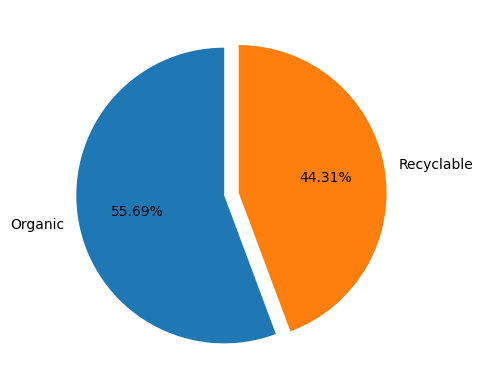

In [16]:
color = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%', startangle = 90, explode=[0.05,0.05])